In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv('C:\\Users\\2216027\\kaggle7\\train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.shape

(10886, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
df.isnull()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,False,False,False,False,False,False,False,False,False,False,False,False
10882,False,False,False,False,False,False,False,False,False,False,False,False
10883,False,False,False,False,False,False,False,False,False,False,False,False
10884,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
df.isnull().sum().sum()

0

Data Preprocessing

In [9]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['quarter'] = df['datetime'].dt.quarter
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

df['season'] = df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
df['holiday'] = df['holiday'].map({0:'Not holiday',1:'holiday'})
df['workingday'] = df['workingday'].map({0:'Not workingday',1:'workingday'})
df['weather'] = df['weather'].map({1:'Clear, Few clouds, Partly cloudy, Partly cloudy',
                                   2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                                   3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                                   4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})

Bike Shaing count by Year

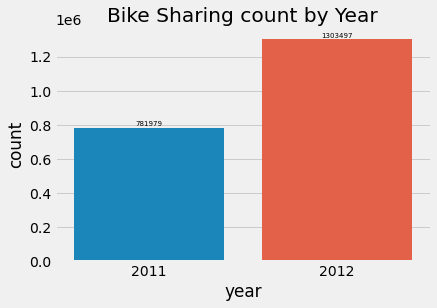

In [10]:
year_count = df.groupby('year')['count'].sum().reset_index()
g = sns.barplot(data=year_count,x='year',y='count')
for v in year_count.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.count+1e4,s=str(v.count), size=7, ha="center")
plt.title('Bike Sharing count by Year')
plt.show()

Bike Sharing count by Year and Quarter

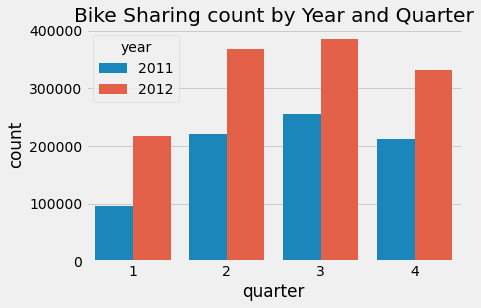

In [11]:
year_quarter_count = df.groupby(['year','quarter'])['count'].sum().reset_index()
sns.barplot(data=year_quarter_count,x='quarter',y='count',hue='year')
plt.title('Bike Sharing count by Year and Quarter')
plt.show()


Bike Sharing count by Year and Month

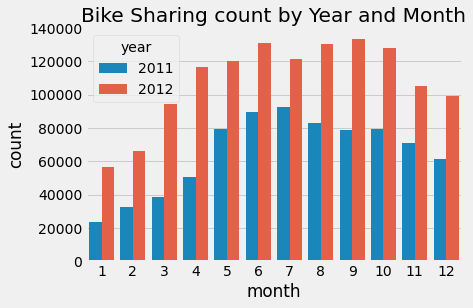

In [12]:
year_month_count = df.groupby(['year','month'])['count'].sum().reset_index()
sns.barplot(data=year_month_count,x='month',y='count',hue='year')
plt.title('Bike Sharing count by Year and Month')
plt.show()

Bike Sharing count by Year and Day

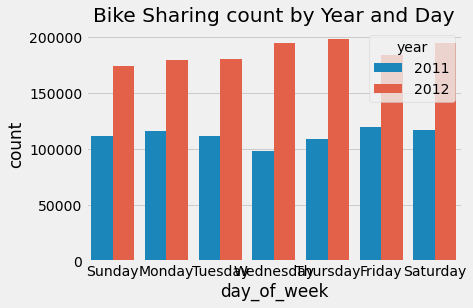

In [14]:
year_day_count = df.groupby(['year','day_of_week'])['count'].sum().reset_index()
order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sns.barplot(data=year_day_count,x='day_of_week',y='count',hue='year',order=order)
plt.title('Bike Sharing count by Year and Day')
plt.show()

Bike Sharing count by Year and Hour

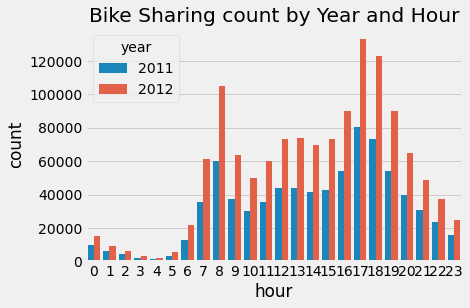

In [15]:
year_hour_count = df.groupby(['year','hour'])['count'].sum().reset_index()
sns.barplot(data=year_hour_count,x='hour',y='count',hue='year')
plt.title('Bike Sharing count by Year and Hour')
plt.show()

Bike Sharing count by Year and Season

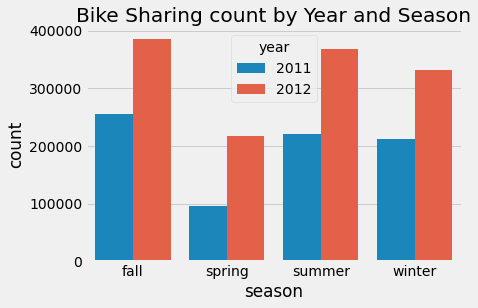

In [16]:
year_season_count = df.groupby(['year','season'])['count'].sum().reset_index()
sns.barplot(data=year_season_count,x='season',y='count',hue='year')
plt.title('Bike Sharing count by Year and Season')
plt.show()

Bike Sharing count by Holiday or not

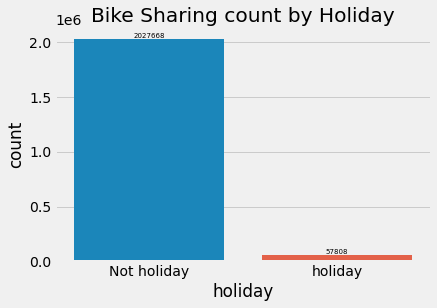

In [17]:
holiday_count = df.groupby('holiday')['count'].sum().reset_index()
g = sns.barplot(data=holiday_count,x='holiday',y='count')
for v in holiday_count.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.count+1e4,s=str(v.count), size=7, ha="center")
plt.title('Bike Sharing count by Holiday')
plt.show()

Bike Sharing count by Working Day

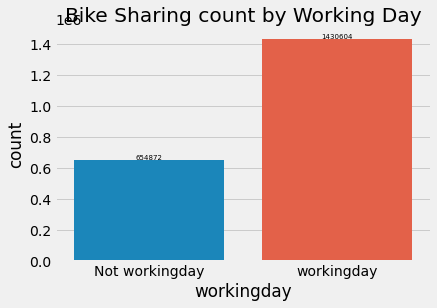

In [18]:
work_count = df.groupby('workingday')['count'].sum().reset_index()
g = sns.barplot(data=work_count,x='workingday',y='count')
for v in work_count.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.count,s=str(v.count), size=7, ha="center")
plt.title('Bike Sharing count by Working Day')
plt.show()

Bike Sharing count by Weather

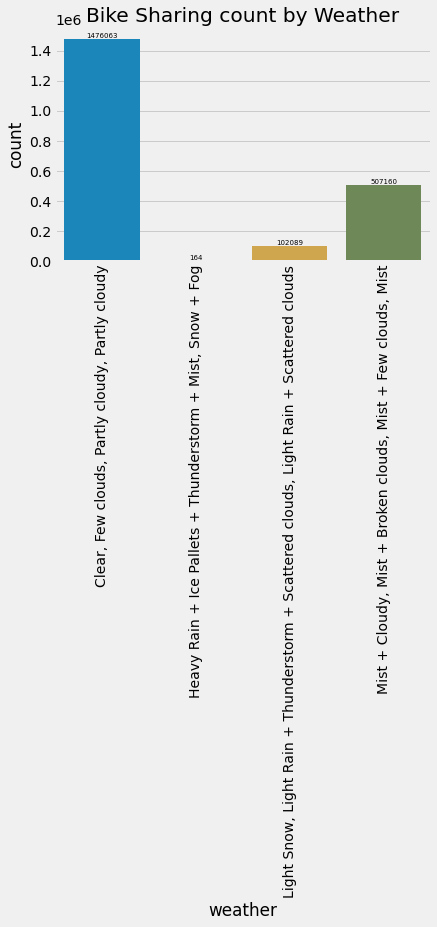

In [19]:
weather_count = df.groupby('weather')['count'].sum().reset_index()
g = sns.barplot(data=weather_count,x='weather',y='count')
for v in weather_count.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.count+1e4,s=str(v.count), size=7, ha="center")
plt.title('Bike Sharing count by Weather')
plt.xticks(rotation=90)
plt.show()

Distribution of count

<AxesSubplot:xlabel='count', ylabel='Density'>

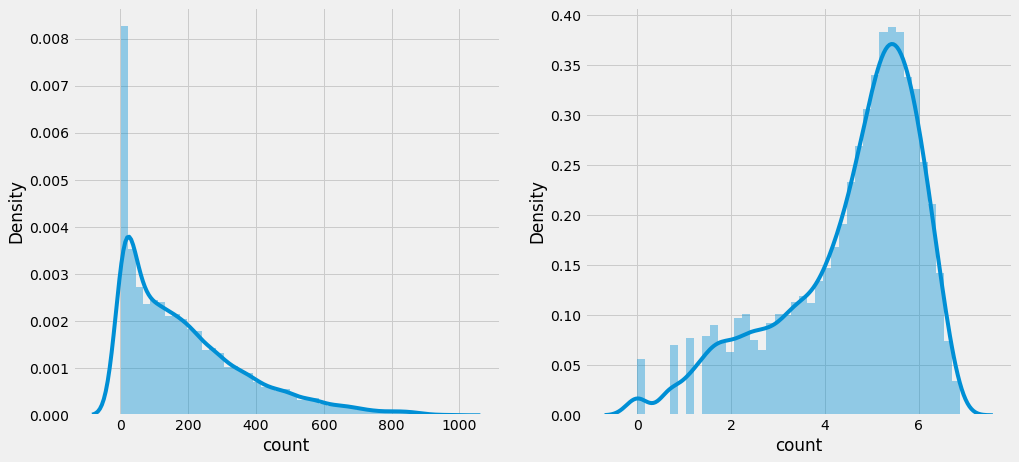

In [20]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.distplot(df['count'])
plt.subplot(1,2,2)
sns.distplot(np.log(df['count']))

Visualization of temp,humidity and windspeed

<AxesSubplot:xlabel='windspeed', ylabel='count'>

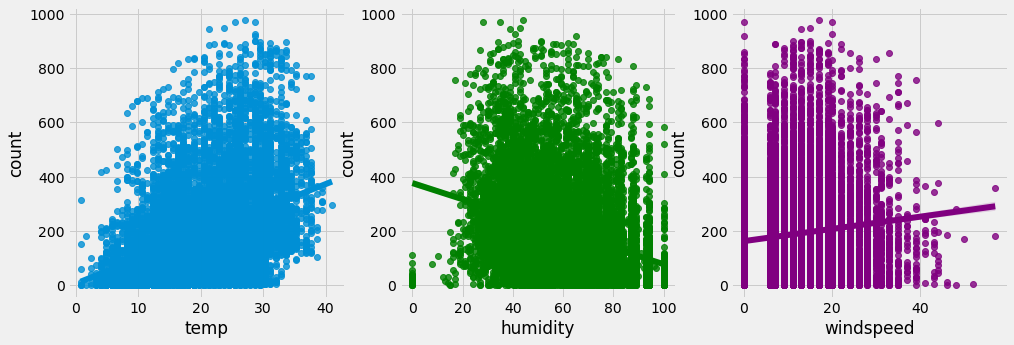

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.regplot(data=df,x='temp',y='count')
plt.subplot(1,3,2)
sns.regplot(data=df,x='humidity',y='count',color='green')
plt.subplot(1,3,3)
sns.regplot(data=df,x='windspeed',y='count',color='purple')

Visualization of Hour & Count Vs (season,day, registered)

<AxesSubplot:xlabel='hour', ylabel='count'>

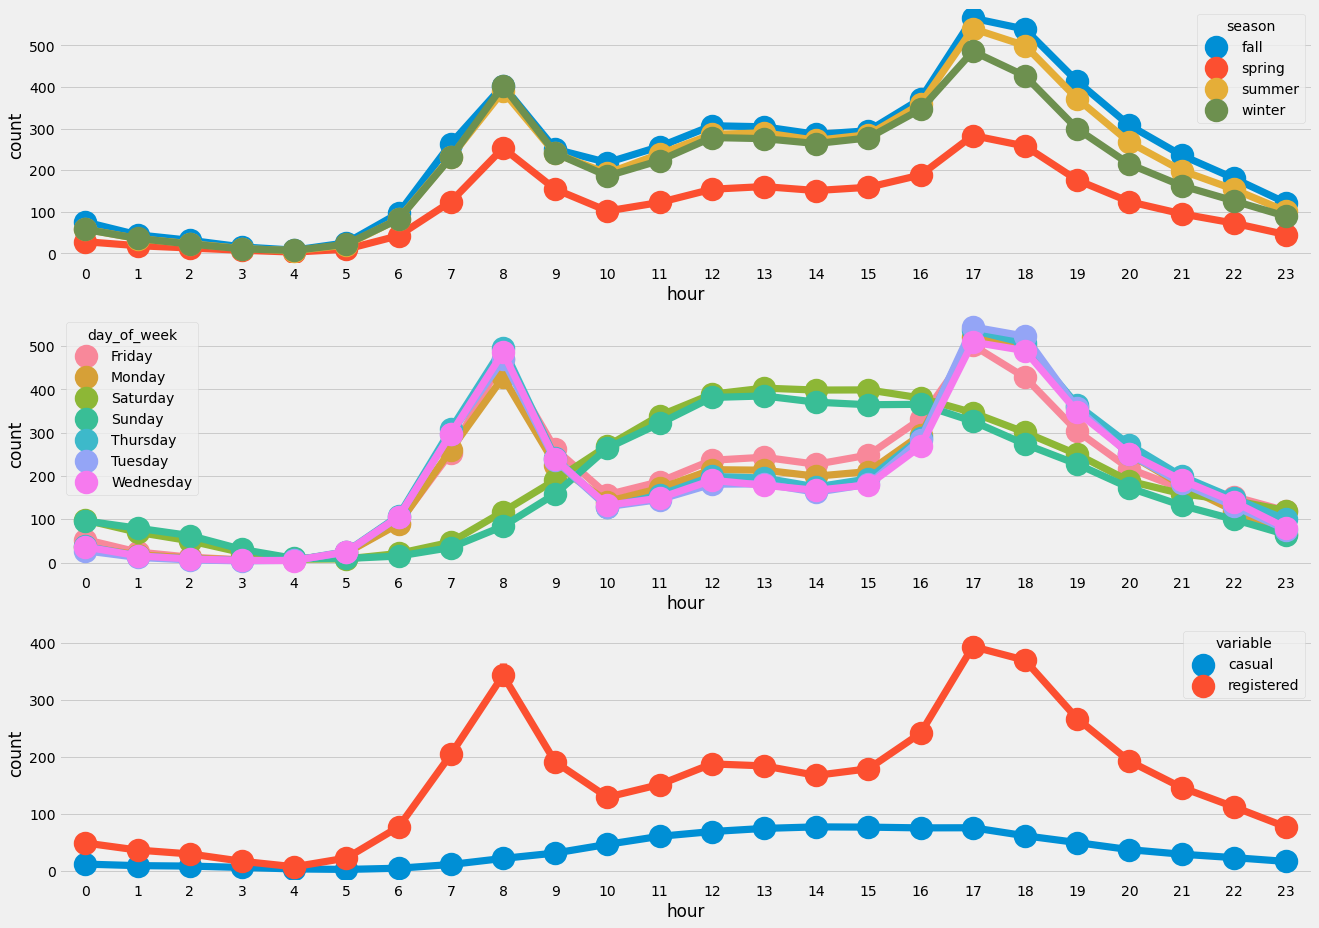

In [22]:
hour_season_count = df.groupby(['hour','season'])['count'].mean().reset_index()
hour_day_count = df.groupby(['hour','day_of_week'])['count'].mean().reset_index()
hour_reg_count = df.groupby(['hour','casual','registered'])['count'].mean().reset_index()
hour_reg_count = pd.melt(hour_reg_count,id_vars=['hour'],value_vars=['casual','registered'],value_name='count')

plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.pointplot(data=hour_season_count,x='hour',y='count',hue='season')
plt.subplot(3,1,2)
sns.pointplot(data=hour_day_count,x='hour',y='count',hue='day_of_week')
plt.subplot(3,1,3)
sns.pointplot(data=hour_reg_count,x='hour',y='count',hue='variable')

Data Preprocessing

In [23]:
df.drop(['datetime','casual','registered','year'],axis=1,inplace=True)

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = le.fit_transform(df[c])

In [25]:
X = df.drop('count',axis=1)
y = df['count']

In [26]:
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((8708, 12), (8708,), (2178, 12), (2178,))

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test) 
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.0,1.0,0.0,0.673469,0.694932,0.83,0.105325,0.666667,0.545455,1.000000,0.217391
1,0.000000,0.0,0.0,0.0,0.897959,0.898311,0.39,0.350888,0.666667,0.636364,0.333333,0.695652
2,0.000000,0.0,1.0,0.0,0.795918,0.779617,0.41,0.298225,0.666667,0.545455,1.000000,0.652174
3,0.666667,0.0,0.0,1.0,0.346939,0.389753,0.93,0.122840,0.333333,0.272727,0.500000,0.173913
4,1.000000,0.0,0.0,0.0,0.306122,0.321960,0.45,0.298225,1.000000,0.909091,0.333333,0.434783


In [29]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import math

In [31]:
# Creating an XGBRegression object with default paramters
xgb_reg = XGBRegressor(n_jobs = -1) # default paramters
xgb_reg.get_params()


{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [32]:
# Fitting the XGBRegression model on the train dataset
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [33]:
# Predicting on the test dataset
y_pred_test = xgb_reg.predict(X_test)
r2score = round(r2_score(y_pred_test,y_test),2)*100
# Calculating the R2 score on the test dataset
print("R2 Score on Test Data is : ",r2score)

R2 Score on Test Data is :  86.0


In [34]:
# Calculating Mean Sqaured Error & Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred_test)
rmse = round(math.sqrt(mse),2)
print(rmse)

62.92


Rnadom Search for XGboost Regression

In [36]:
# Performing RandomizedSearchCV for hyperparameter tuning
params = {
        'n_estimators' : [100, 200, 500, 750], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5
param_comb = 100

random_search = RandomizedSearchCV(xgb_reg, param_distributions=params, n_iter=param_comb, n_jobs=-1, cv=folds, verbose=3, random_state=42)

# Fitting on the train set
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=100, n_jobs=-1,
                                    

In [37]:
# Printing the best score that we can get using the parameters
print('We can get score of :',random_search.best_score_,' using',random_search.best_params_)

We can get score of : 0.8839963882867939  using {'subsample': 0.6, 'n_estimators': 500, 'min_child_weight': 10, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [38]:
# Creating XGBRegression model with the select hyperparameters
xgb_reg_hpt = XGBRegressor(subsample=0.6, n_estimators=750, min_child_weight=10,max_depth=10,
                               learning_rate=0.02, gamma=0.5, colsample_bytree=0.8, n_jobs = -1)
xgb_reg_hpt.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.8,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0.5,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.02,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 10,
 'max_leaves': None,
 'min_child_weight': 10,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 750,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.6,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [39]:
# Fitting the model on the train set
xgb_reg_hpt.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=750, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [40]:
# Predicting on the test set
y_pred_test_hpt = xgb_reg_hpt.predict(X_test)

# Calculating R2 score on test set
r2score = round(r2_score(y_pred_test_hpt,y_test),2)*100

# Printing the R2 score on test dataset
print("R2 score on Test Data is : ",r2score)

R2 score on Test Data is :  87.0


In [41]:
# Calculating Mean Sqaured Error & Root Mean Squared Error of the test set
mse = mean_squared_error(y_test, y_pred_test_hpt)
rmse = round(math.sqrt(mse),2)
print(rmse)

60.18


Prediction and Model Evaluation

In [42]:
# Calculating R2 score
y_train_pred = xgb_reg_hpt.predict(X_train)
y_test_pred = xgb_reg_hpt.predict(X_test)

r2_train_lr = r2_score(y_train, y_train_pred)
print("R2 score on Training data : ",round(r2_train_lr,2)*100)

r2_test_lr = r2_score(y_test, y_test_pred)
print("R2 score on Test data : ",round(r2_test_lr,2)*100)

R2 score on Training data :  97.0
R2 score on Test data :  89.0


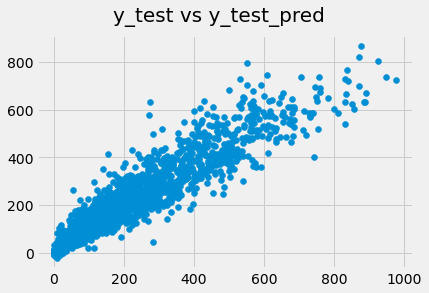

In [43]:
# Plotting a scatter plot of the actual and predicted values of the test set
fig = plt.figure()
fig.suptitle('y_test vs y_test_pred',fontsize=20)
plt.scatter(y_test,y_test_pred)